### <font color='blue'>Experiments with Gaussian generative models</font>

This notebook contains code that takes the parameters of a Gaussian generative model for two-dimensional data and does the following:
* It generates a few points from the model
* It plots the decision regions as well as the points

Begin with some standard includes.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

This next function, `generate_data`, generates `n` points from a Gaussian generative model whose parameters are:
* `pi`: a vector of class weights
* `mu`: mean of each class (one row for each mean)
* `sigma`: covariance matrix of each class

In particular, if there are `k` classes, then `pi` is an array of size `k`, `mu` is an array of size `(k,2)` (since the data is two-dimensional) and `sigma` is an array of size `(k,2,2)`.

In [2]:
def generate_data(pi, mu, sigma, n):
    k = pi.shape[0] # classes
    x = np.zeros((n,2)) # the data
    # First select the label for each point
    y = np.random.choice(k, n, p=pi) # each point's label
    # Now generate the x values given the labels
    for i in range(0,n):
        c = y[i]
        x[i,:] = np.random.multivariate_normal(mu[c], sigma[c])
    return x, y

The function `predict_on_grid` applies the generative model (`pi`, `mu`, `sigma`) to make predictions on every point of a grid. The parameter `grid` is an array of size `(gn, 2)`, where each row specifies a particular two-dimensional point on the grid.

In [3]:
def predict_on_grid(pi,mu,sigma,grid):
    k = pi.shape[0] # classes
    gn = grid.shape[0]
    Z = np.zeros(gn)
    score = np.zeros((gn,k))
    for label in range(0,k):
        rv = multivariate_normal(mean=mu[label], cov=sigma[label])
        for i in range(gn):
            score[i,label] = np.log(pi[label]) + rv.logpdf(grid[i,:])
    Z = np.argmax(score, axis=1)
    return Z

Function `show_boundary` draws the decision boundary for model (`pi`, `mu`, `sigma`) as well as plotting the points `x` (with labels `y`).

It works as follows:
* First it determines a bounding box for points `x`. This box is `[x0min, x0max] x [x1min, x1max]`.
* Then it puts a fine grid, of side length `delta`, on this bounding box.
* It uses the Gaussian generative model (`pi`, `mu`, `sigma`) to predict a label for every point on the grid.
* It then uses these predictions to color the grid

In [4]:
def show_boundary(pi,mu,sigma,x,y):
    n = y.shape[0] # number of points
    delta = 0.05
    x0min = min(x[:,0]) - 1
    x0max = max(x[:,0]) + 1   
    x1min = min(x[:,1]) - 1
    x1max = max(x[:,1]) + 1
    xx, yy = np.meshgrid(np.arange(x0min, x0max, delta), np.arange(x1min, x1max, delta))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_on_grid(pi,mu,sigma,grid)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20c, vmin=-2, vmax=2)

    # Plot also the training points
    for i in range(0,n):
        c = y[i]
        plt.plot(x[i,0], x[i,1], 'o', color=cols[c], markersize=2)
    
    plt.xlim(x0min, x0max)
    plt.ylim(x1min, x1max)
    plt.axis('equal')
    plt.show()

Finally, let's call these functions.

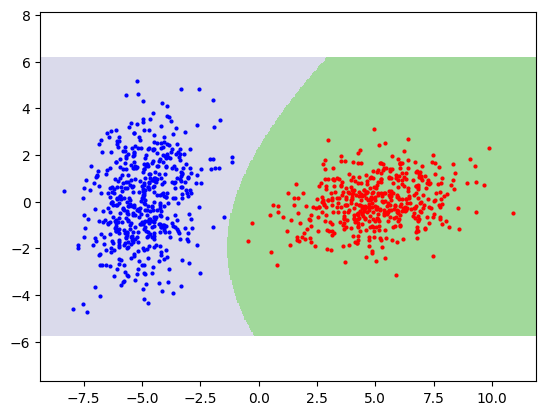

In [20]:
# Number of classes
k = 2 
#
# Class weights
pi = np.zeros(k)
pi[0] = 0.5
pi[1] = 0.5
#
# Class means
mu = np.zeros((k,2))
mu[0,] = [5,0]
mu[1,] = [-5,0]

# Select a color for each class
cols = ['red', 'blue']

# Covariance matrices
sigma = np.zeros((k,2,2))

# # vertical boundary
# sigma[0,] = [[1,0],[0,1]]
# sigma[1,] = [[1,0],[0,1]]

# # Generate 1000 points
# x,y = generate_data(pi,mu,sigma,1000)

# # Show boundary (and points)
# show_boundary(pi,mu,sigma,x,y)

# # -----------------------------------------------

# # tilted boundary
# sigma[0,] = [[2,0.8],[0.8,1]]
# sigma[1,] = [[2,0.8],[0.8,1]]

# # Generate 1000 points
# x,y = generate_data(pi,mu,sigma,1000)

# # Show boundary (and points)
# show_boundary(pi,mu,sigma,x,y)

# # -----------------------------------------------

# # spherical boundary
# sigma[0] = [[1,0],[0,1]]
# sigma[1] = [[4,0],[0,4]]

# # Generate 1000 points
# x,y = generate_data(pi,mu,sigma,1000)

# # Show boundary (and points)
# show_boundary(pi,mu,sigma,x,y)

# -----------------------------------------------

# boundary that is either elliptical or parabolic
sigma[0] = np.array([ [3.5, 0.5], [0.5, 1] ]) # An ellipse stretched along x-axis
sigma[1] = np.array([ [1.5, 0.5], [0.5, 3] ]) # An ellipse stretched along y-axis

# Generate 1000 points
x,y = generate_data(pi,mu,sigma,1000)

# Show boundary (and points)
show_boundary(pi,mu,sigma,x,y)